In [4]:
# Correlation, nonlinear correlations, Surrogates & Sample size effets in SMALL data
# based on Maximilian Vogt's solution, but corrected
# Jan Nagler
from numpy.random import seed
from numpy.random import randn
import numpy as np
from numpy import mean
from numpy import std
from numpy import cov
from matplotlib import pyplot
import matplotlib.pyplot as plt

Create two random variables with a given correlation to each other. 
Let $X_1$ and $X_2$ denote two random variables with mean 0 and variance 1 and create $Y$ according to
$$Y = \rho * X_1 + \sqrt{(1-\rho^2)} * X_2.$$
Proof:
$$\rho(X_1,Y) = cov(X_1,Y) = \mathbb{E}(X_1 * Y) = \mathbb{E} (X_1 * (\rho * X_1 + \sqrt{(1-\rho^2)} * X_2))$$
Using the linear independence of $X_1$ and $X_2$ and noting that the expectation operator is a linear operator, it is:
$$\mathbb{E} (X_1 * (\rho * X_1 + \sqrt{(1-\rho^2)} * X_2)) = \rho \mathbb{E}(X_1^2) + \sqrt{(1-\rho^2)} * \mathbb{E}(X_1 X_2)$$ 
Now, note that $\mathbb{E}(X_1^2) = Var(X_1) = 1$, it is:
$$\rho \mathbb{E}(X_1^2) + \sqrt{(1-\rho^2)} * \mathbb{E}(X_1 X_2) = \rho * 1 + \sqrt{(1-\rho^2)} * 0  = \rho = \rho(X_1,Y)$$

In [23]:
# Create two data series as given above with target correlation r
def target_corr(r):
    seed(1)
    x1 = randn(1000)
    x2 = randn(1000)
    y = r * x1 + np.sqrt(1-np.power(r,2))*x2
    return x1, y

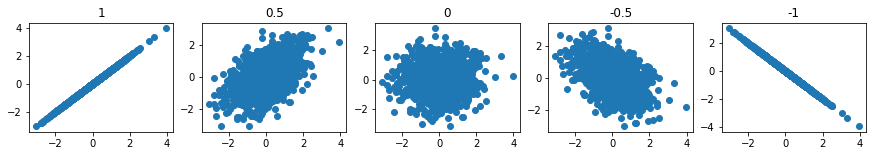

In [24]:
# Plot correlated data series for some realisations of r
fig, ax = plt.subplots(1,5, figsize = (15,2))
correlations = [1, 0.5, 0, -0.5, -1]

for i in range(len(correlations)):
    x, y = target_corr(r = correlations[i])
    ax[i].scatter(x,y)
    ax[i].set_title(correlations[i], )

Generate a random variable with target mean $\mu$ and target variance $\sigma^2$. For this, we draw a small number n of samples from a normal distribution with the target mean and variance. 
Moreover, we do this multiple times and analyse the sample (empirical) variance of the mean of these samples. 

In [25]:
# Generate the mean of random realisations of a normal distribution with target mean and variance for rep times
def sample_means(n, mu, sigma, rep):
    y = np.zeros(rep)
    for i in range(rep):
        x = np.random.normal(mu,sigma,size=n)
        y[i] = (1/n) * sum(x)
    return y

In [26]:
# Get the variance of the mean for several (100) draws
tmp = np.zeros(100)
sigma = 2
n = 10
for i in range(100):
    av = sample_means(n,1,sigma,100)
    tmp[i] = np.mean((av - np.mean(av))**2)

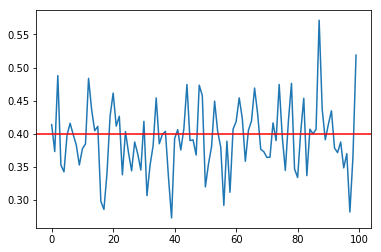

In [27]:
# Plot the empirical variance with the expected variance of the mean
plt.plot(tmp) #plot fluctuations
plt.axhline(y=(np.square(sigma)/n), color = 'r') #plot red line at sigma^2/n

The sample variance of the sample mean is itself a random variable that is fluctuating around $\frac{\sigma^2}{n}$. While an unbiased estimate of the sample variance (and hence the estimate that should be closest to our data) is given by $\frac{\sigma^2}{n-1}$, the data generated above is fairly close to $\frac{\sigma^2}{n}$.